In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def plot_sys(v,t):
        plt.plot(t,v(t))
        plt.xlabel('Quantity of water consumed')
        plt.ylabel('Average rate of flow')

In [3]:
k_0 = 350#Carrying capacity 
x_0 =300
def logistic(q, k=k_0,r= 0.01):
    return k_0/(1+ np.exp(-r*(q-x_0)))

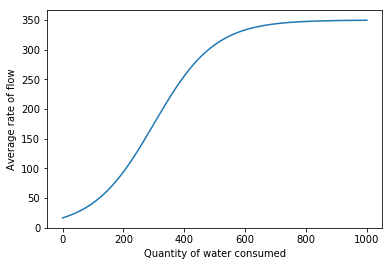

In [10]:
x = np.linspace(1,6, 10)
q= np.linspace(0,1000,10000)
plot_sys(logistic,q)
plt.show()

In [107]:
s_0 = 1000
# Requires: v0: initial volume
#           T:  timesteps
#           T_drink: times of drinking
#           Q: The corresponding amount drunk
#           s0: the constant of threshold for firing
#           k, r: the parameters of logistic
#           PROP: proportion of the water drunk that reaches bladder (const. set to 0.68)
# Modifies: nothing
# Returns: V, the volume of liquid in bladder
#          R, the rates
def integ_fire(T, T_drink, Q, model_type = 1,
               v0=0, s0=s_0, k=k_0, r=0.01, PROP=0.68):
    
        q = np.linspace(0,1000,10000)
        MINr = min(logistic(q,k,r)) 
        epsilon_r = 0
        thresh = s0 # modify if needed
        V = np.zeros(len(T)) # volume of bladder
        R = np.zeros(len(T)) # keeping R
        
        rbar = 0#float(logistic(np.mean(q), k, r)) /60 # a default value
        t_total = T[-1]#PROP*np.mean(q)/rbar # a default value 
        q = 0
        
        i_drink = 0
        t_prevDrink = 0
        
        for i, t in enumerate(T[:-1]):
            
            if (V[i] > thresh):
                #print('Fire')
                V[i+1] = 0
                continue
                
            if (t in T_drink):
              
                if (t-t_prevDrink > t_total):
                    q = Q[i_drink]
                else:
                    #print('early drink')
                    q = (1/PROP)*rbar*(t_total - (t - t_prevDrink)) + Q[i_drink]
                
                rbar = logistic(q, k, r)/60 # from ml/hr to ml/min
                #print(rbar)
                t_total = PROP*q/rbar
                i_drink += 1
                t_prevDrink = t
            if model_type == 1:
                rate = rbar # this is for const rate
                V[i+1] = V[i] + rate
                R[i] = rate
            elif model_type == 2:
                rate = max(2*rbar*(1 - (t-t_prevDrink)/t_total), 0) # this is dV/dt # this is for variable r
                V[i+1] = V[i] + rate
                R[i] = rate
            

            
        return V, R
                    

In [131]:
T = [x for x in range(8*60)] # over a day

T_drink = set()
Q = []
for i in range(8):
    #chooses 20 random times to drink in the day
    T_drink.add(random.choice(T))
    Q = Q + [random.randint(0, 700)]
    

In [132]:
np.array(T_drink)

array({35, 77, 78, 463, 212, 468, 214, 377}, dtype=object)

In [133]:
sum(np.array(Q))

2980

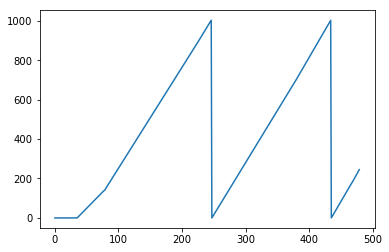

In [134]:
intfi = integ_fire(T, T_drink, Q, 1)
plt.plot(T, intfi[0])
plt.show()

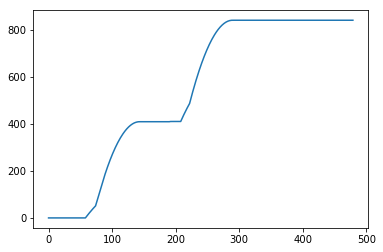

In [122]:
intfi = integ_fire(T, T_drink, Q, 2)
plt.plot(T, intfi[0])
plt.show()